In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DF = pd.read_csv("messy_employee_data_balanced_1000.csv")
df = DF.copy()
df

,ID,Name,Age,Department,Salary
0,1,Jack,NaN,Sales,"30,975"
1,2,Charlie,NaN,finance,?
2,3,Sophia,23,MARKETING,72k
3,4,xander,44,HR,?
4,5,Eve,NaN,FINANCE,?
...,...,...,...,...,...
995,996,Paul,22yrs,Marketing,54476
996,997,Hannah,?,FINANCE,49943
997,998,Bob,47,Finance,89234
998,999,Zane,51,NaN,92700


In [3]:
df.isnull().sum()

ID              0
Name            0
Age           167
Department     98
Salary         93
dtype: int64

In [4]:
df["Age"] = df["Age"].fillna("-")

In [5]:
df.loc[df["Age"].str.lower() == "twenty", "Age"] = 20
df["Age"] = df["Age"].astype(str).str.lower().str.split("yrs").str[0]

In [6]:
df.loc[df["Age"].str.strip().str.lower() == "?", "Age"] = "-"

In [7]:
df

,ID,Name,Age,Department,Salary
0,1,Jack,-,Sales,"30,975"
1,2,Charlie,-,finance,?
2,3,Sophia,23,MARKETING,72k
3,4,xander,44,HR,?
4,5,Eve,-,FINANCE,?
...,...,...,...,...,...
995,996,Paul,22,Marketing,54476
996,997,Hannah,-,FINANCE,49943
997,998,Bob,47,Finance,89234
998,999,Zane,51,NaN,92700


In [8]:
df.isnull().sum()

ID             0
Name           0
Age            0
Department    98
Salary        93
dtype: int64

In [9]:
df["Salary"] = df["Salary"].astype(str).str.replace("k","000")

In [10]:
df["Salary"] = df["Salary"].astype(str).str.strip().str.replace(",","")
df["Salary"] = df["Salary"].replace({"?":"-"})
df["Salary"] = df["Salary"].replace({"sixtyfive":"65000"})
df["Salary"] = df["Salary"].replace({"nan":"-"})

In [11]:
df["Salary"] = df["Salary"].apply(lambda x: int(x) if x != "-" else x)

In [12]:
df["Age"] = df["Age"].apply(lambda x: int(x) if x != "-" else x)

In [13]:
df["Department"] = df["Department"].fillna("-")
df["Department"] = df["Department"].str.upper()

In [14]:
df["Department"] = df["Department"].apply(lambda x: x.upper() if x in ["IT", "HR"] else x.capitalize())

In [15]:
df["Name"] = df["Name"].str.capitalize()

In [16]:
df.to_csv("Cleaned_Data.csv", index=False)

In [17]:
# Now to answer some questions
# Q.1) How many employees work in each department ?
df.groupby("Department")["Name"].count()

Department
-             98
Finance      184
HR           167
IT           190
Marketing    211
Sales        150
Name: Name, dtype: int64

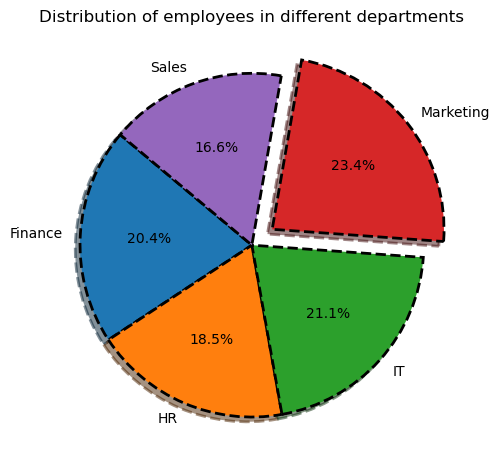

In [123]:
Department = ["Finance", "HR", "IT", "Marketing", "Sales"]
Employees = [184, 167, 190, 211, 150]
explode = [0, 0, 0, 0.15, 0]

plt.pie(Employees, labels=Department, autopct="%1.1f%%", explode=explode, shadow=True, startangle = 140,
       wedgeprops = {"edgecolor":"black","linewidth":2,"linestyle":"--"})
plt.title("Distribution of employees in different departments")
plt.tight_layout()
plt.show()

In [32]:
df["Salary"] = df["Salary"].apply(lambda x: float(x) if x != "-" else np.nan)

In [97]:
name_salaries = df.groupby("Name")["Salary"].max()
top10 = name_salaries.sort_values(ascending = False).head(10)

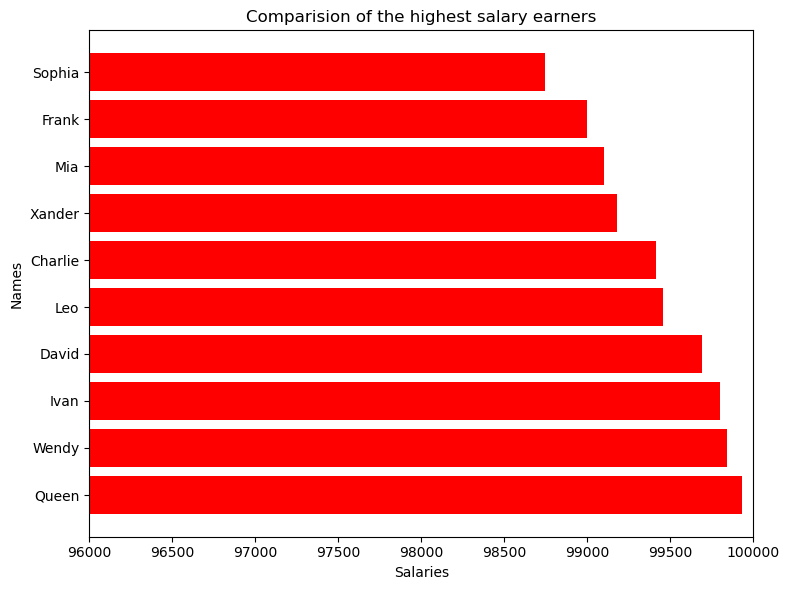

In [134]:
names = top10.index
salaries = top10.to_list()
plt.figure(figsize=(8, 6))
plt.barh(names, salaries, color="red")
plt.title("Comparision of the highest salary earners")
plt.xlabel("Salaries")
plt.ylabel("Names")
plt.xlim(96000, 100000)
plt.tight_layout()
plt.show()